In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [12]:
# Load the Sentiment Analysis dataset
dataset = pd.read_csv('test.csv', encoding='latin-1')

In [13]:
# Check dataset structure, features, and size
print(dataset.head())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [14]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
None


In [15]:
dataset.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [16]:
print(dataset.columns)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')


In [17]:
# Identify key variables: text content and sentiment labels
text_column = 'text'
sentiment_column = 'sentiment'

In [19]:
#Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Lowercasing
dataset[text_column] = dataset[text_column].str.lower()

In [21]:
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: str(x) if isinstance(x, (str, np.generic)) else np.nan)
dataset['sentiment'] = dataset['sentiment'].astype(str)

In [22]:
dataset.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [23]:
# Tokenization and lemmatization
lemmatizer = WordNetLemmatizer()

In [24]:
dataset['sentiment'] = dataset['sentiment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

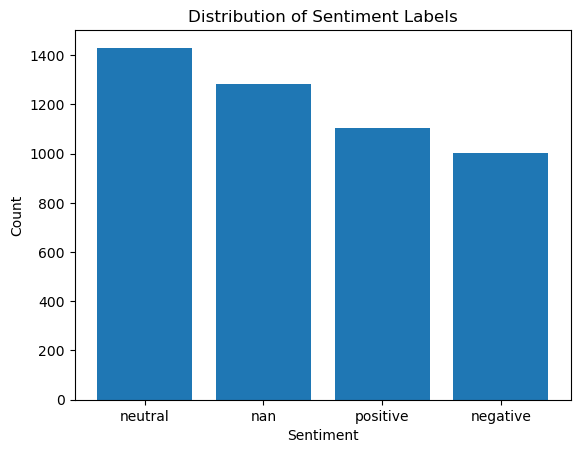

In [25]:
#Exploratory Data Analysis (EDA)
# Distribution of sentiment labels
sentiment_distribution = dataset[sentiment_column].value_counts()
plt.bar(sentiment_distribution.index, sentiment_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [26]:
# Convert text in a DataFrame column to bytes
dataset['byte_column'] = dataset['sentiment'].apply(lambda x: x.encode())

In [27]:
# Convert text into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(dataset['sentiment'])

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, dataset[sentiment_column], test_size=0.2, random_state=42)

In [30]:
# Train Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [31]:
# Evaluate model performance
y_pred = naive_bayes.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
